<a href="https://colab.research.google.com/github/VedantTgithub/123/blob/main/QAPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload the CSV file from your local system
uploaded = files.upload()

# Get the filename of the uploaded CSV file
file_name = next(iter(uploaded))

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(df.head())


Saving insurance.csv to insurance.csv
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<ipython-input-2-2972ef8298d3>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


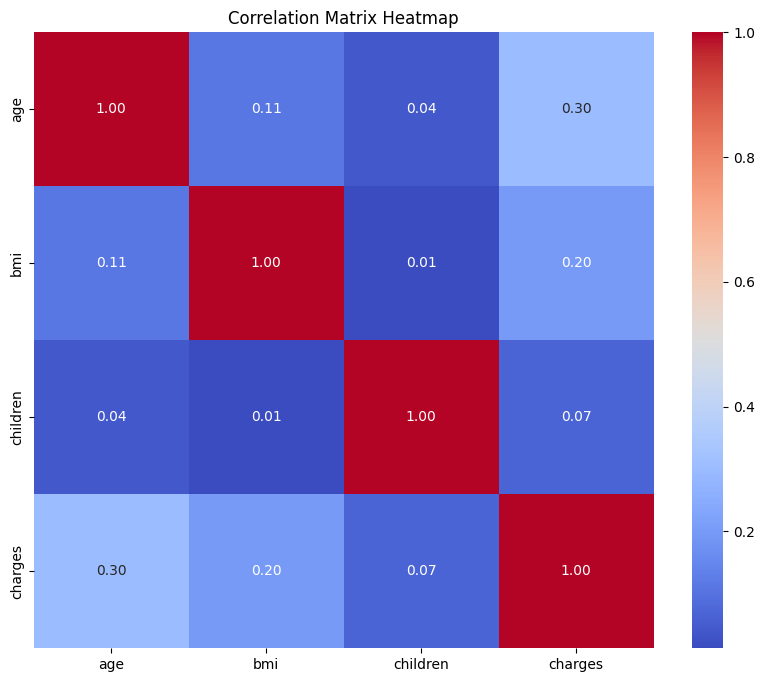

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("insurance.csv")

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [3]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("insurance.csv")

# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define dependent variable
y = df['charges']

# Define independent variables
X = df.drop(columns=['charges'])

# Add constant to independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

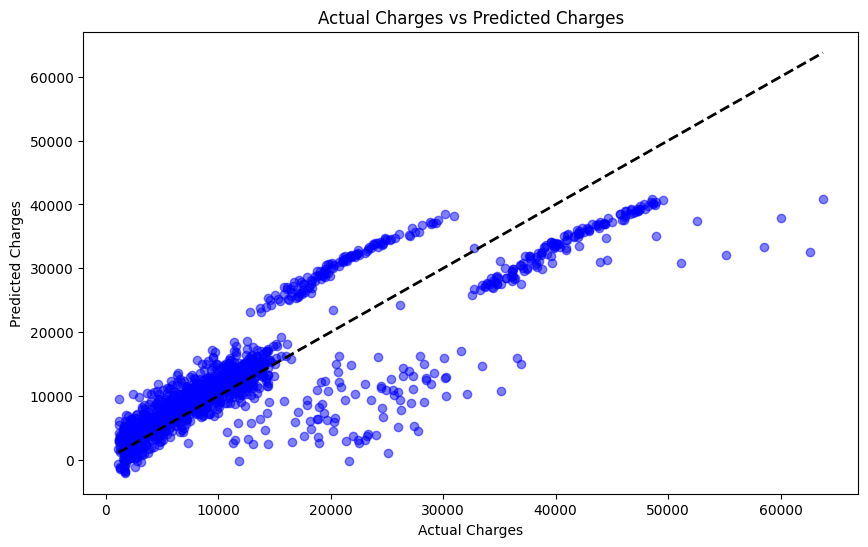

In [4]:
import matplotlib.pyplot as plt

# Get predicted charges from the model
predicted_charges = model.predict(X)

# Plot actual charges vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_charges, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()


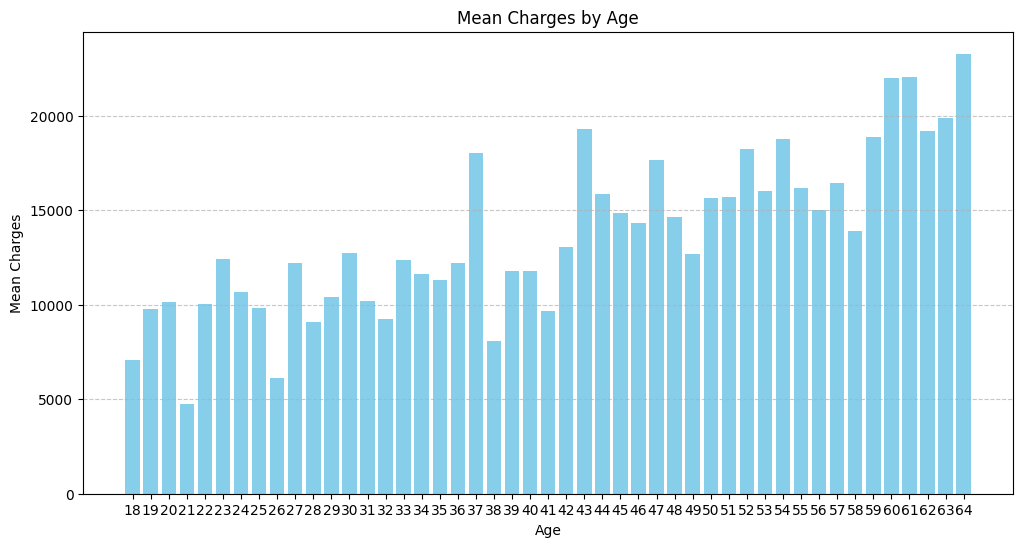

In [5]:
# Group data by age and calculate mean charges
age_charges = df.groupby('age')['charges'].mean().reset_index()

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(age_charges['age'], age_charges['charges'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Age')
plt.xticks(age_charges['age'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


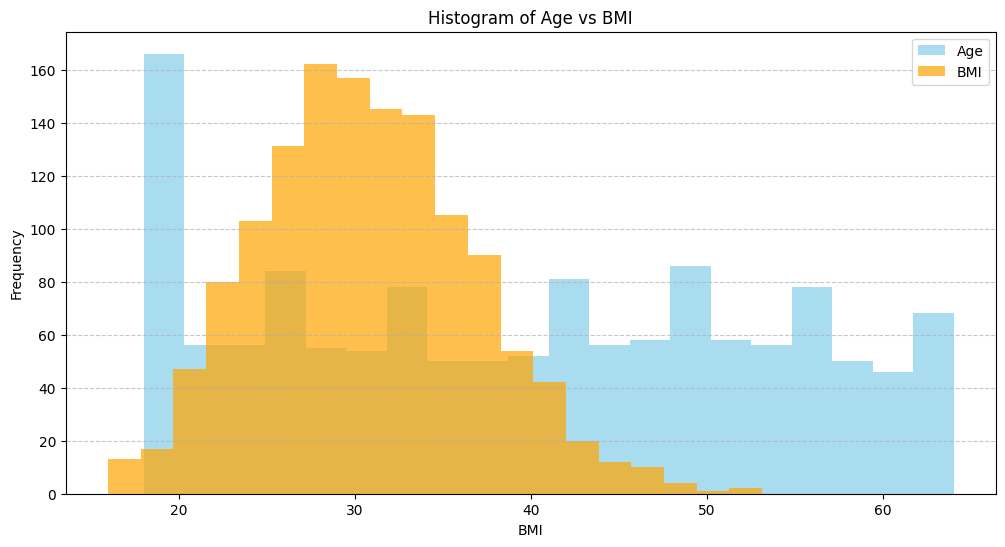

In [6]:
# Plotting histogram for Age
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=20, color='skyblue', alpha=0.7, label='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age vs BMI')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Overlaying histogram for BMI
plt.hist(df['bmi'], bins=20, color='orange', alpha=0.7, label='BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [7]:
# Calculate the count of each region
region_counts = df['region'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.show()


KeyError: 'region'